# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data
train = pd.read_csv("termdeposit_train.csv")
test = pd.read_csv("termdeposit_test.csv")

In [3]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [7]:
train.shape

(31647, 18)

In [8]:
test.shape

(13564, 17)

In [9]:
#Printing the first 5 rows of the train dataset
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [10]:
#Printing the first 5 rows of the test dataset
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


# Exploratory Data Analysis(EDA)

In [11]:
#checking for missing values in train dataset
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [12]:
#Checking for missing values in test dataset
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [13]:
#checking the value counts of each column
for i in train.columns:
    print(train[i].value_counts())
    print("\n")

4098     1
2804     1
15090    1
33509    1
23262    1
        ..
1418     1
28039    1
25990    1
32133    1
2047     1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
94       1
93       1
90       1
95       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


0        2470
1         137
2         109
4          95
3          88
         ... 
1193        1
7338        1
1586        1
9421        1
10

In [14]:
#checking the value counts of each column
for i in test.columns:
    print(test[i].value_counts())
    print("\n")

2049     1
34849    1
3483     1
23969    1
5662     1
        ..
8945     1
31482    1
29435    1
35588    1
34815    1
Name: ID, Length: 13564, dtype: int64


32    628
34    609
35    580
31    579
33    566
     ... 
92      1
90      1
86      1
89      1
95      1
Name: age, Length: 75, dtype: int64


blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64


married     8119
single      3868
divorced    1577
Name: marital, dtype: int64


secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64


no     13334
yes      230
Name: default, dtype: int64


 0       1044
 1         58
 2         47
 3         46
 4         44
         ... 
 1920       1
 6010       1
 2541       1
-500        1
 3986       1
Name: 

In [15]:
#Separating Numerical and Categorical columns

#Checking for categorical columns
categorical_col = []
for i in train.dtypes.index:
    if train.dtypes[i] == "object":
        categorical_col.append(i)
        
print("Categorical Columns: ", categorical_col)
print("\n")

#Checking for Numerical columns
numerical_col = []
for i in train.dtypes.index:
    if train.dtypes[i]!= "object":
        numerical_col.append(i)
        
print("Numerical Columns: ", numerical_col)
print("\n")

Categorical Columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


Numerical Columns:  ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']




In [16]:
#Separating Numerical and Categorical columns

#Checking for categorical columns
categorical_col = []
for i in test.dtypes.index:
    if test.dtypes[i] == "object":
        categorical_col.append(i)
        
print("Categorical Columns: ", categorical_col)
print("\n")

#Checking for Numerical columns
numerical_col = []
for i in test.dtypes.index:
    if test.dtypes[i]!= "object":
        numerical_col.append(i)
        
print("Numerical Columns: ", numerical_col)
print("\n")

Categorical Columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


Numerical Columns:  ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']




In [17]:
# Checking number of unique values in each column
train.nunique().to_frame("No. of unique values")

,No. of unique values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


In [18]:
# Checking the unique values in target column
train["subscribed"].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [19]:
# Checking number of unique values in each column
test.nunique().to_frame("No. of unique values")

,No. of unique values
ID,13564
age,75
job,12
marital,3
education,4
default,2
balance,4292
housing,2
loan,2
contact,3


# Desciption of Dataset

In [20]:
# Statistical summary of numerical column
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [21]:
test.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


# Data Visualization

Univariate Analysis

<AxesSubplot:xlabel='subscribed', ylabel='count'>

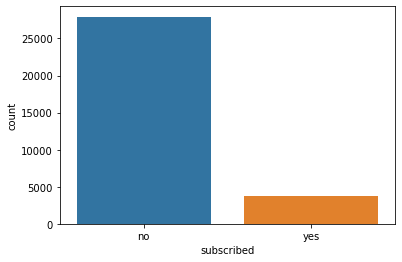

In [22]:
# Plotting the 'subscribed' frequency
sns.countplot(data=train, x='subscribed')

In [23]:
#Frequency table
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

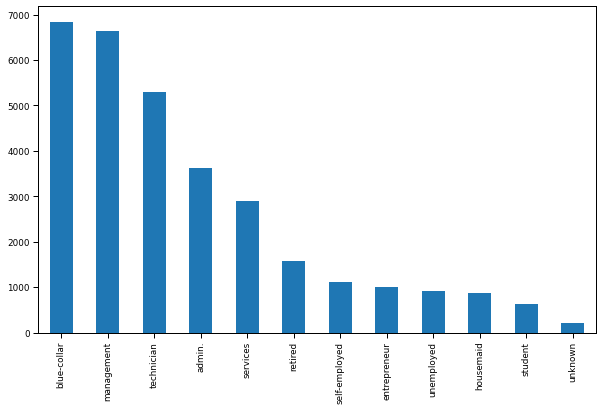

In [24]:
# Plotting the job frequency table
sns.set_context('paper')
train['job'].value_counts().plot(kind='bar', figsize=(10,6));

In [25]:
train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

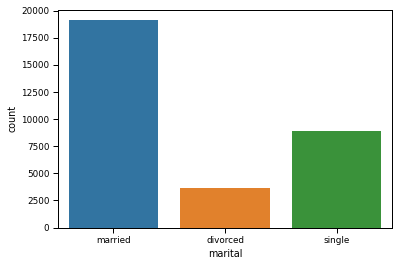

In [26]:
sns.countplot(data=train, x='marital');

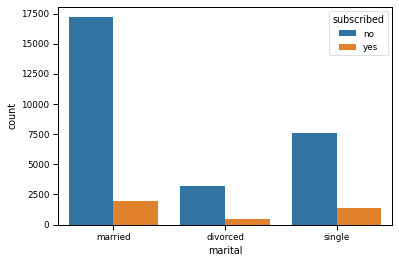

In [27]:
sns.countplot(data=train, x='marital', hue='subscribed');

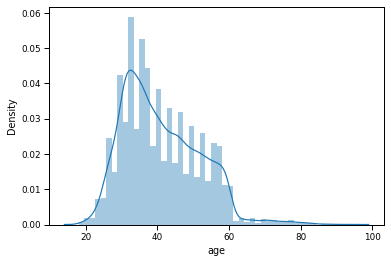

In [28]:
sns.distplot(train['age']);

# Bivariate Analysis

In [29]:
#job vs subscribed
print(pd.crosstab(train['job'],train['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


In [30]:
job = pd.crosstab(train['job'],train['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

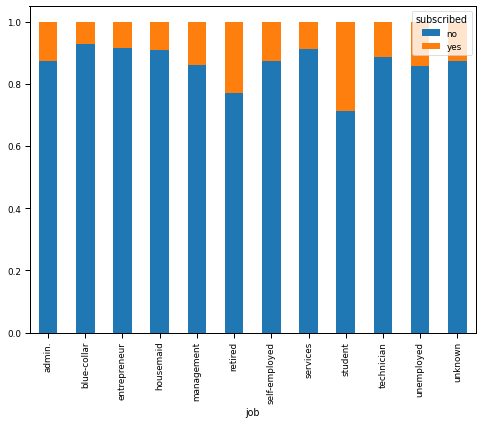

In [31]:
job_norm.plot.bar(stacked=True,figsize=(8,6));

In [32]:
#Marital status vs subscribed
pd.crosstab(train['marital'], train['subscribed'])

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


In [33]:
marital = pd.crosstab(train['marital'], train['subscribed'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

subscribed,no,yes
marital,,
divorced,0.877410,0.122590
married,0.899502,0.100498
single,0.848577,0.151423


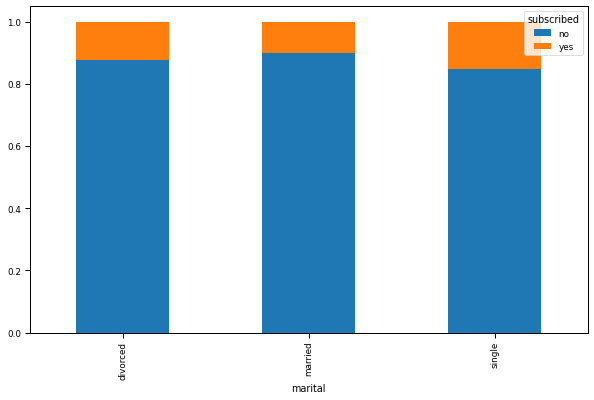

In [34]:
marital_norm.plot.bar(stacked=True, figsize=(10,6));

In [35]:
#default vs subscription
pd.crosstab(train['default'], train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


In [36]:
dflt = pd.crosstab(train['default'], train['subscribed'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

subscribed,no,yes
default,,
no,0.881720,0.118280
yes,0.929915,0.070085


<AxesSubplot:xlabel='default'>

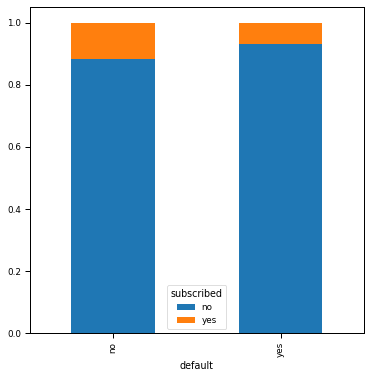

In [37]:

dflt_norm.plot.bar(stacked=True, figsize=(6,6))

In [38]:
# Converting the target variables into 0s and 1s
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [39]:
train['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

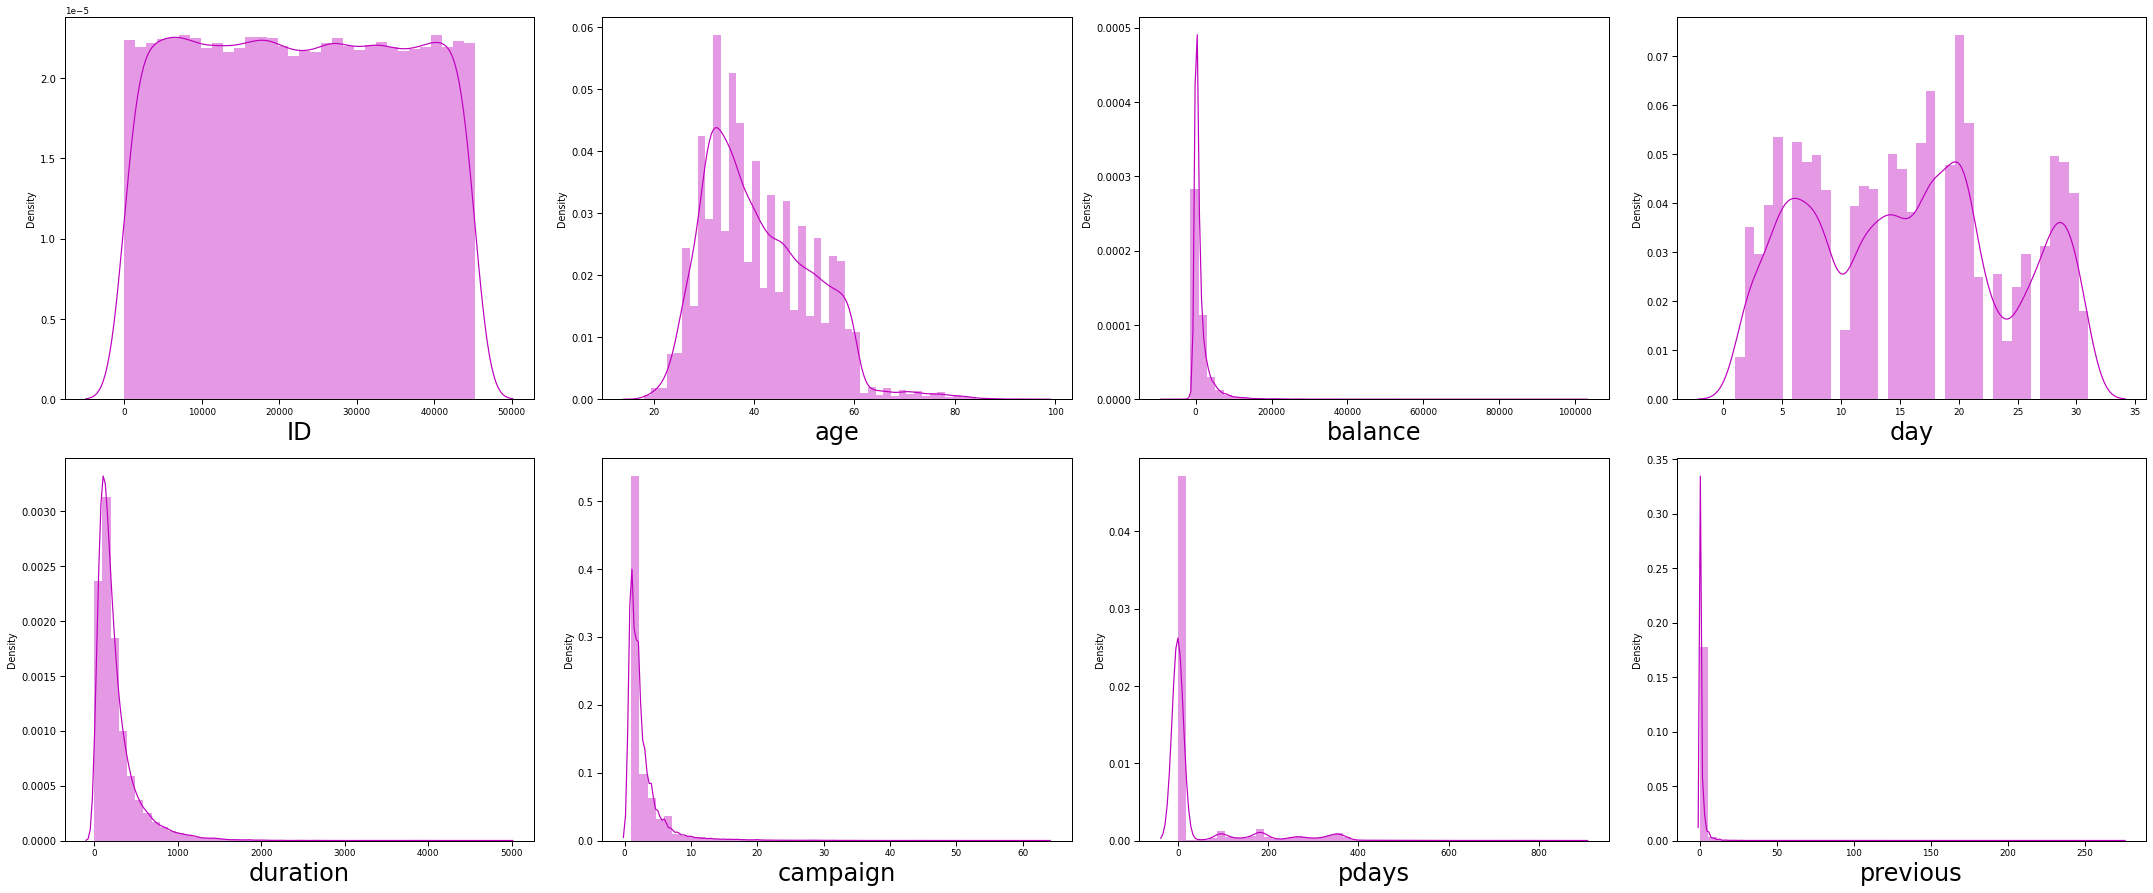

In [40]:
#let's check how the data has been distributed in remaining column
from socket import socket
plt.figure(figsize = (30, 18), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=8:
        ax = plt.subplot(3, 4, plotnumber)
        sns.distplot(train[col], color = "m")
        plt.xlabel(col, fontsize = 24)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

# Multivariate Analysis

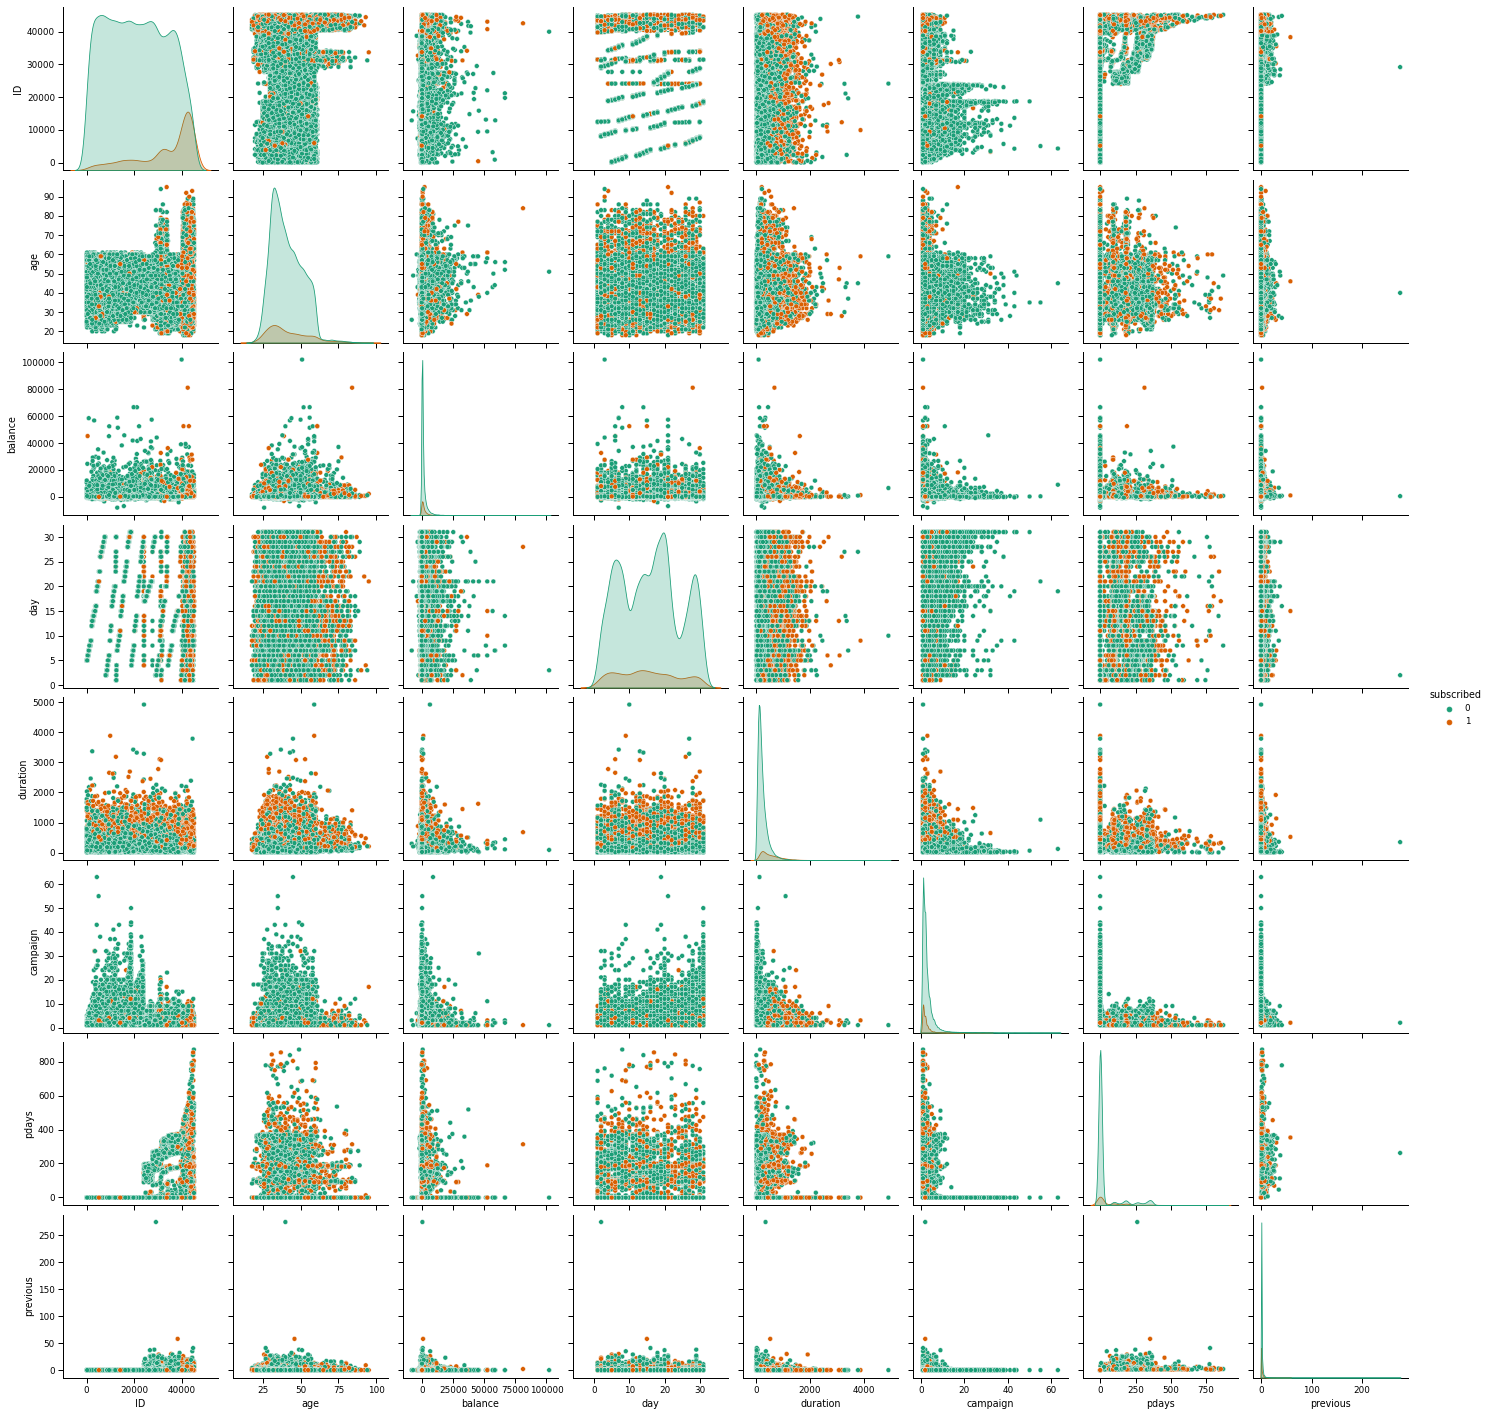

In [41]:
sns.pairplot(train, hue = 'subscribed', palette = "Dark2")
plt.show()

# Checking for Outliers

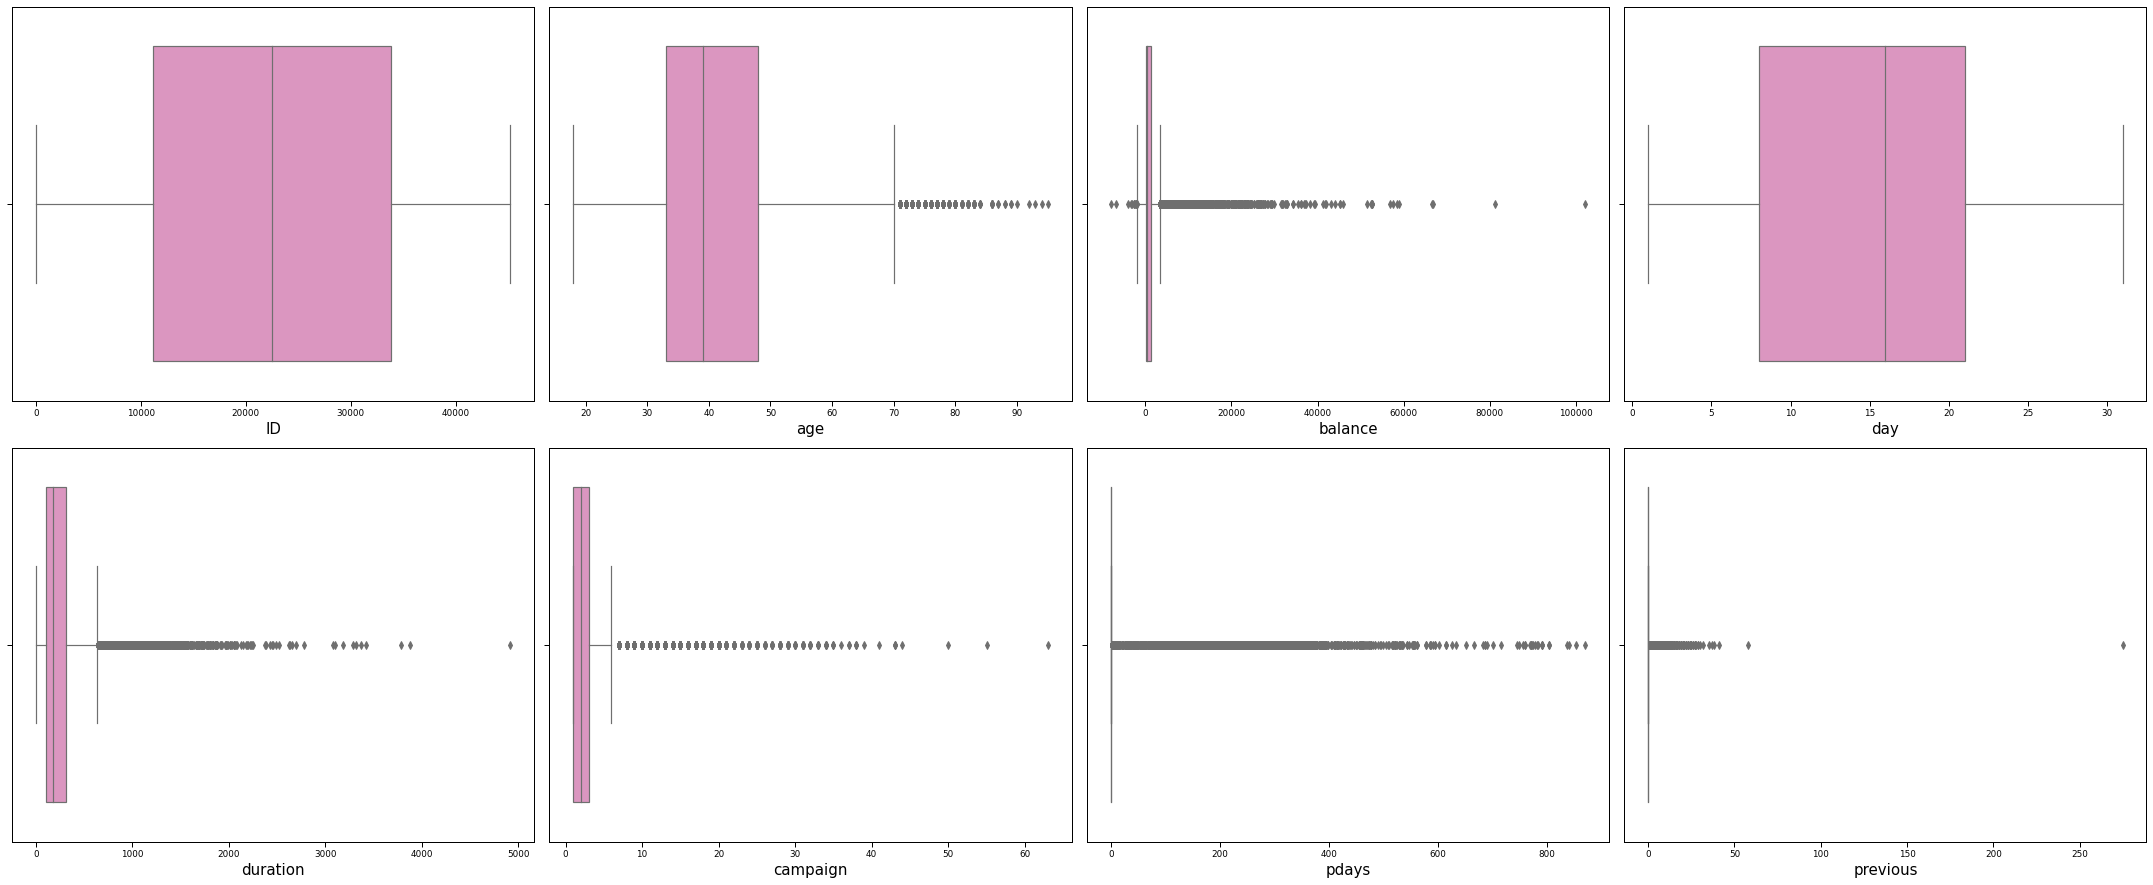

In [42]:
# Lets check the outliers by plotting boxplot

plt.figure(figsize = (30, 18), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=8:
        ax = plt.subplot(3, 4, plotnumber)
        sns.boxplot(train[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

# Checking for skweness

In [43]:
train.skew()

ID             0.005851
age            0.681607
balance        7.995696
day            0.087185
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
subscribed     2.377445
dtype: float64

# Removing Skweness

In [44]:
# Removing skewness using cuberoot method
train['age'] = np.cbrt(train['age'])
train['balance'] = np.cbrt(train['balance'])
train['duration'] = np.cbrt(train['duration'])
train['campaign'] = np.cbrt(train['campaign'])
train['pdays'] = np.cbrt(train['pdays'])
train['previous'] = np.cbrt(train['previous'])

In [45]:
# checking skweness again
train.skew()

ID            0.005851
age           0.286363
balance      -0.086014
day           0.087185
duration      0.647275
campaign      1.667938
pdays         1.779036
previous      2.079738
subscribed    2.377445
dtype: float64

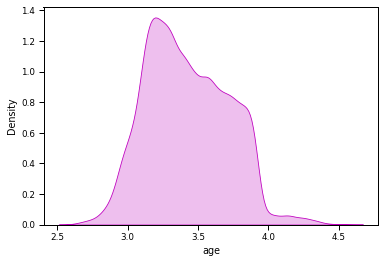

In [46]:
# Lets visualize how the data has been distributed in age after removing skewness
sns.distplot(train['age'], color = 'm', kde_kws = {"shade":True}, hist = False)
plt.show()

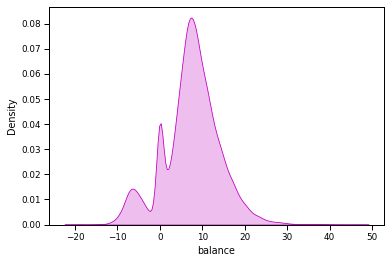

In [47]:
# Lets visualize how the data has been distributed in balance after removing skewness
sns.distplot(train['balance'], color = 'm', kde_kws = {"shade":True}, hist = False)
plt.show()

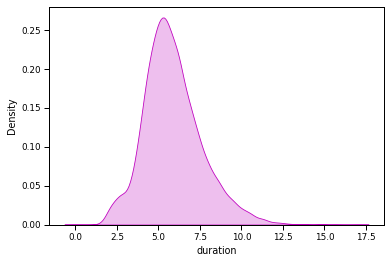

In [48]:
# Lets visualize how the data has been distributed in duration after removing skewness
sns.distplot(train['duration'], color = 'm', kde_kws = {"shade":True}, hist = False)
plt.show()

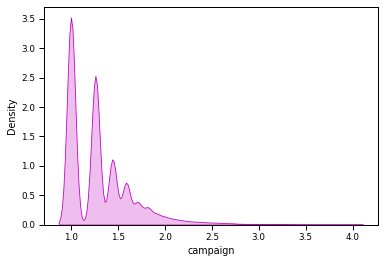

In [49]:
# Lets visualize how the data has been distributed in campaign after removing skewness
sns.distplot(train['campaign'], color = 'm', kde_kws = {"shade":True}, hist = False)
plt.show()

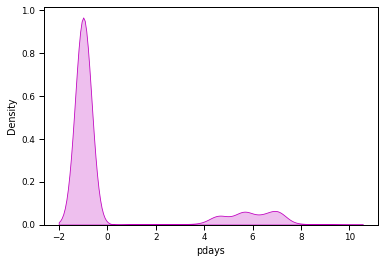

In [50]:
# Lets visualize how the data has been distributed in pdays after removing skewness
sns.distplot(train['pdays'], color = 'm', kde_kws = {"shade":True}, hist = False)
plt.show()

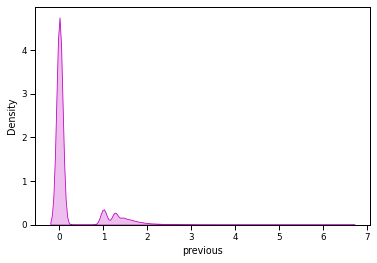

In [51]:
# Lets visualize how the data has been distributed in previous after removing skewness
sns.distplot(train['previous'], color = 'm', kde_kws = {"shade":True}, hist = False)
plt.show()

# Correlation between target variable and independent variables.

In [52]:
# Checking the correlation between features and the target
cor = train.corr()
cor

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,-0.007347,0.132513,-0.063399,0.012626,-0.114966,0.488188,0.478953,0.296663
age,-0.007347,1.000000,0.097645,-0.008998,-0.014250,0.023006,-0.011360,-0.000488,0.009310
balance,0.132513,0.097645,1.000000,-0.011106,0.038476,-0.035939,0.060453,0.070936,0.097107
day,-0.063399,-0.008998,-0.011106,1.000000,-0.052736,0.164516,-0.084394,-0.078785,-0.029600
duration,0.012626,-0.014250,0.038476,-0.052736,1.000000,-0.143372,0.016528,0.015303,0.379716
campaign,-0.114966,0.023006,-0.035939,0.164516,-0.143372,1.000000,-0.114032,-0.097897,-0.082134
pdays,0.488188,-0.011360,0.060453,-0.084394,0.016528,-0.114032,1.000000,0.935643,0.152555
previous,0.478953,-0.000488,0.070936,-0.078785,0.015303,-0.097897,0.935643,1.000000,0.167908
subscribed,0.296663,0.009310,0.097107,-0.029600,0.379716,-0.082134,0.152555,0.167908,1.000000


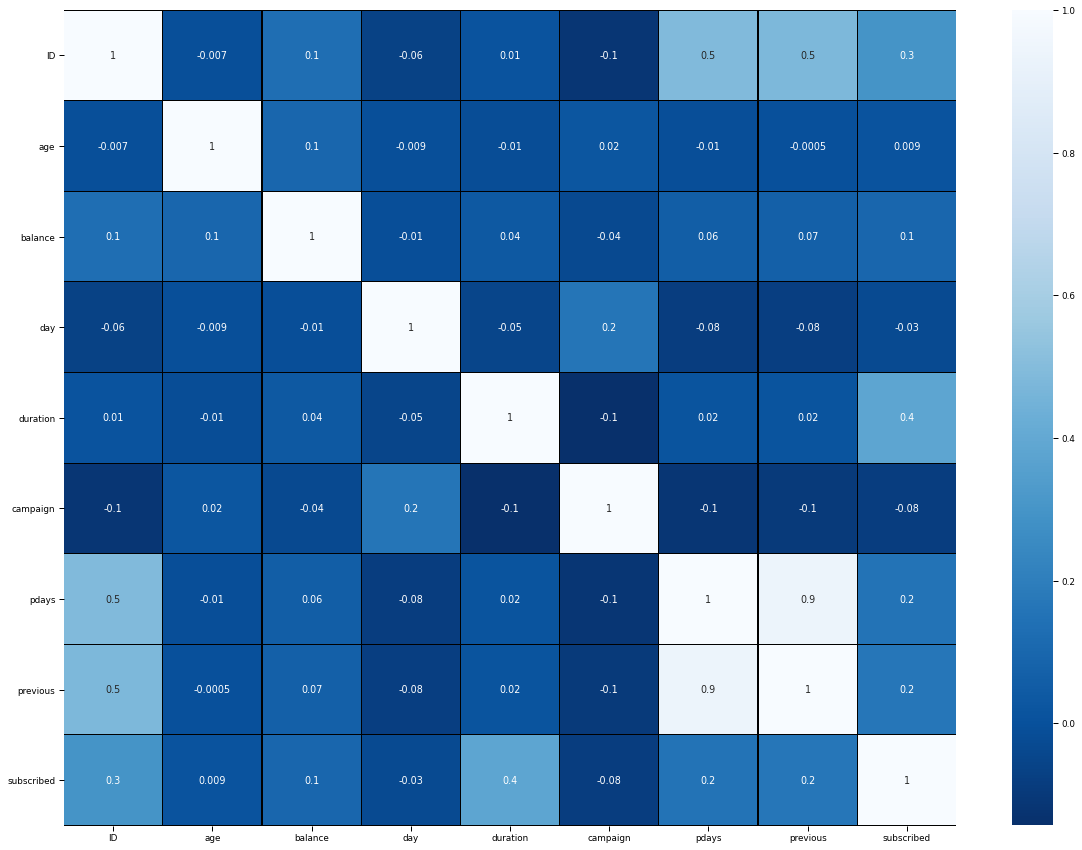

In [53]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20, 15))
sns.heatmap(train.corr(), linewidths = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0);
plt.show()

In [54]:
cor['subscribed'].sort_values(ascending = False)

subscribed    1.000000
duration      0.379716
ID            0.296663
previous      0.167908
pdays         0.152555
balance       0.097107
age           0.009310
day          -0.029600
campaign     -0.082134
Name: subscribed, dtype: float64

# Visualizing the correlation between label and features using bar plot

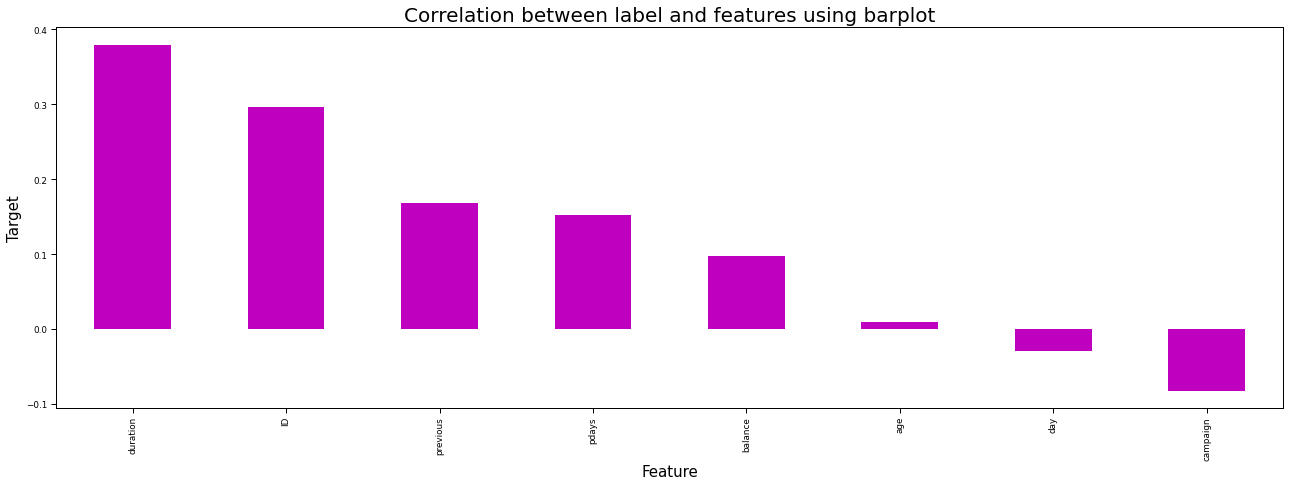

In [55]:
plt.figure(figsize = (22, 7))
train.corr()['subscribed'].sort_values(ascending = False).drop(['subscribed']).plot(kind = 'bar', color = "m")
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title("Correlation between label and features using barplot", fontsize = 20)
plt.show()

# Separating features and label

# Feature Scaling using Standard Scalarization

In [56]:
#generating dummy values on the train dataset
train = pd.get_dummies(train)
train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,3.825862,12.456918,19,3.530348,1.259921,-1.000000,0.00000,0,1,...,0,0,0,1,0,0,0,0,0,1
1,40576,3.141381,1.442250,20,4.497941,1.259921,-1.000000,0.00000,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,3.000000,9.622603,18,6.214465,1.000000,-1.000000,0.00000,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,3.848501,14.868480,22,9.535417,1.000000,4.379519,1.44225,1,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,3.141381,4.918685,4,7.243156,1.000000,-1.000000,0.00000,0,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
x = train.drop("subscribed", axis = 1)
y = train["subscribed"]

In [58]:
y.value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

# Oversampling

In [59]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x, y)

In [60]:
# Checking value count of target column
y.value_counts()

0    27932
1    27932
Name: subscribed, dtype: int64

# Modelling

# Creating train test split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = maxRs)

# Logistic Regression


In [66]:
from sklearn.linear_model import LogisticRegression
#creating an object of logistic regression model
lreg = LogisticRegression()
#fitting the data into the model
lreg.fit(x_train,y_train)
#Making predictions on the validation set
pred = lreg.predict(x_test)
from sklearn.metrics import accuracy_score
#Calculating the accuracy score
accuracy_score(y_test,pred)

0.8742243436754177

# Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
#creating an object of Decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
#fitting the model
clf.fit(x_train, y_train)
#making predictions on the validation set
predict = clf.predict(x_test)
predict

#Calculating the accuracy
accuracy_score(y_test,predict)

0.8642004773269689

# Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
#creating an object of Decision tree
rfr = RandomForestClassifier(max_depth=4, random_state=0)
#fitting the model
rfr.fit(x_train, y_train)
#making predictions on the validation set
predict = rfr.predict(x_test)
predict

#Calculating the accuracy
accuracy_score(y_test,predict)

0.9039379474940334

# Extra Trees Classifier

In [71]:
from sklearn.ensemble import ExtraTreesClassifier
#creating an object of Decision tree
etc = ExtraTreesClassifier(max_depth=4, random_state=0)
#fitting the model
etc.fit(x_train, y_train)
#making predictions on the validation set
predict = etc.predict(x_test)
predict

#Calculating the accuracy
accuracy_score(y_test,predict)

0.8733890214797136

# Gradient Boosting Classifier

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
#creating an object of Decision tree
gbc = GradientBoostingClassifier(max_depth=4, random_state=0)
#fitting the model
gbc.fit(x_train, y_train)
#making predictions on the validation set
predict = gbc.predict(x_test)
predict

#Calculating the accuracy
accuracy_score(y_test,predict)

0.9445107398568019

# AdaBoost Classifier

In [74]:
from sklearn.ensemble import AdaBoostClassifier
#creating an object of Decision tree
abc = AdaBoostClassifier(random_state=0)
#fitting the model
abc.fit(x_train, y_train)
#making predictions on the validation set
predict = abc.predict(x_test)
predict

#Calculating the accuracy
accuracy_score(y_test,predict)

0.9347852028639618

Let's now make the prediction on test dataset


In [75]:
test = pd.get_dummies(test)
test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [76]:
test_pred = gbc.predict(test)
test_pred

array([0, 0, 1, ..., 0, 1, 1])

# Saving Prediction into CSV

In [77]:
submissions = pd.DataFrame()

In [78]:
submissions['ID'] = test['ID']
submissions['subscribed'] = test_pred

In [79]:
submissions['subscribed']

0        0
1        0
2        1
3        0
4        0
        ..
13559    1
13560    0
13561    0
13562    1
13563    1
Name: subscribed, Length: 13564, dtype: int64

In [80]:
submissions['subscribed'].replace(0,'no',inplace=True)
submissions['subscribed'].replace(1,'yes',inplace=True)

In [81]:
submissions['subscribed']

0         no
1         no
2        yes
3         no
4         no
        ... 
13559    yes
13560     no
13561     no
13562    yes
13563    yes
Name: subscribed, Length: 13564, dtype: object

In [82]:
submissions.to_csv('submission_file.csv', header=True, index=False)